In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.signal import find_peaks
import os
from scipy.stats import norm, chisquare
from sklearn.mixture import GaussianMixture
import pandas as pd

# Enable implicit multi-threading (optional)
ROOT.ROOT.EnableImplicitMT()

%matplotlib widget

In [5]:
file = ROOT.TFile.Open("./data/high_angles.root")
tree = file.Get("sec_electrons")
if not tree:
    print("Tree not found.")
    exit()

df = ROOT.RDataFrame(tree)

X_branch = "x"
Y_branch = 'y'
Z_branch = 'z'
G_branch = 'gain'

# Convert the branch to a NumPy array
x2_arrays = np.array(df.AsNumpy([X_branch])[X_branch]) * 10 # Convert to mm
y2_arrays = np.array(df.AsNumpy([Y_branch])[Y_branch]) * 10 # Convert to mm
z2_arrays = np.array(df.AsNumpy([Z_branch])[Z_branch]) * 10 # Convert to mm
g_arrays = np.array(df.AsNumpy([G_branch])[G_branch]) 

In [29]:
inter_event = []

for j in range(len(x2_arrays)):
    for i, (x,y,z) in enumerate(zip(np.array(x2_arrays[j]), np.array(y2_arrays[j]), np.array(z2_arrays[j]))):
        if i==0: continue
        dx = x2_arrays[j][i-1] - x
        dy = y2_arrays[j][i-1] - y
        dz = z2_arrays[j][i-1] - z
        inter_event.append(np.sqrt(dx**2 + dy**2 + dz**2))

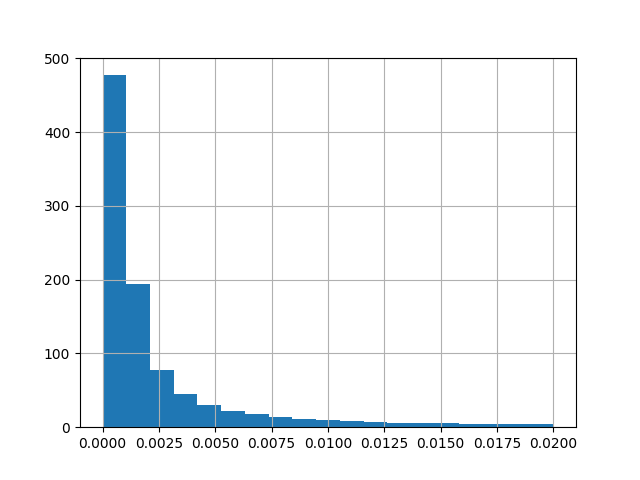

In [28]:
plt.figure()
plt.hist(inter_event, bins=np.linspace(0,0.02, 20), density=True)
plt.grid()

In [31]:
lens = []
for i in x2_arrays:
    lens.append(len(i))

lens = np.array(lens)
print(lens.mean())

90.588


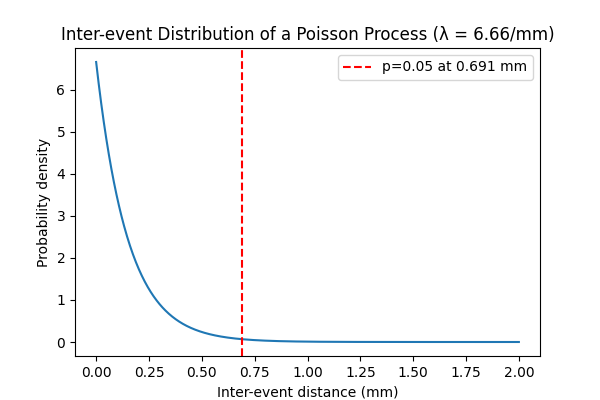

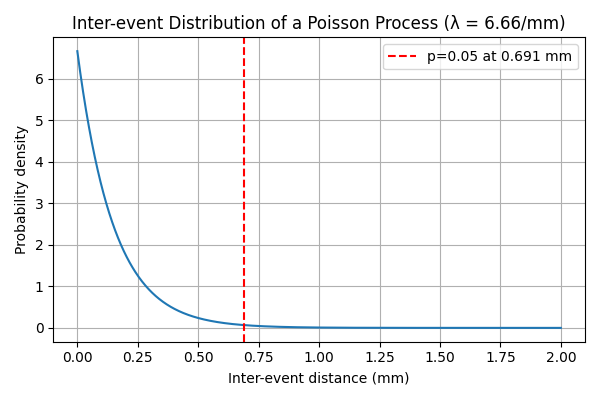

In [36]:
from scipy.stats import expon

# Parameters
lambda_mm = 6.666  # events per mm
scale = 1 / lambda_mm  # mean inter-event distance

# Generate x values (inter-event distances in mm)
x = np.linspace(0, 2, 1000)
pdf = expon.pdf(x, scale=scale)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(x, pdf)
plt.xlabel("Inter-event distance (mm)")
plt.ylabel("Probability density")
plt.title("Inter-event Distribution of a Poisson Process (λ = 6.66/mm)")

d_95 = expon.ppf(0.99, scale=scale)
plt.axvline(d_95, color='red', linestyle='--', label=f'p=0.05 at {d_95:.3f} mm')
plt.legend()
plt.show()

plt.grid(True)
plt.tight_layout()
plt.show()

# Find the inter-event distance where p = 0.05 (i.e., CDF = 0.95)

